# Linear regression

$$h(x) = w_0 + w_1*x$$

In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [115]:
def h(w_0, w_1, x):
    return w_0 + w_1*x

In [116]:
df = pd.read_csv("Housing.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


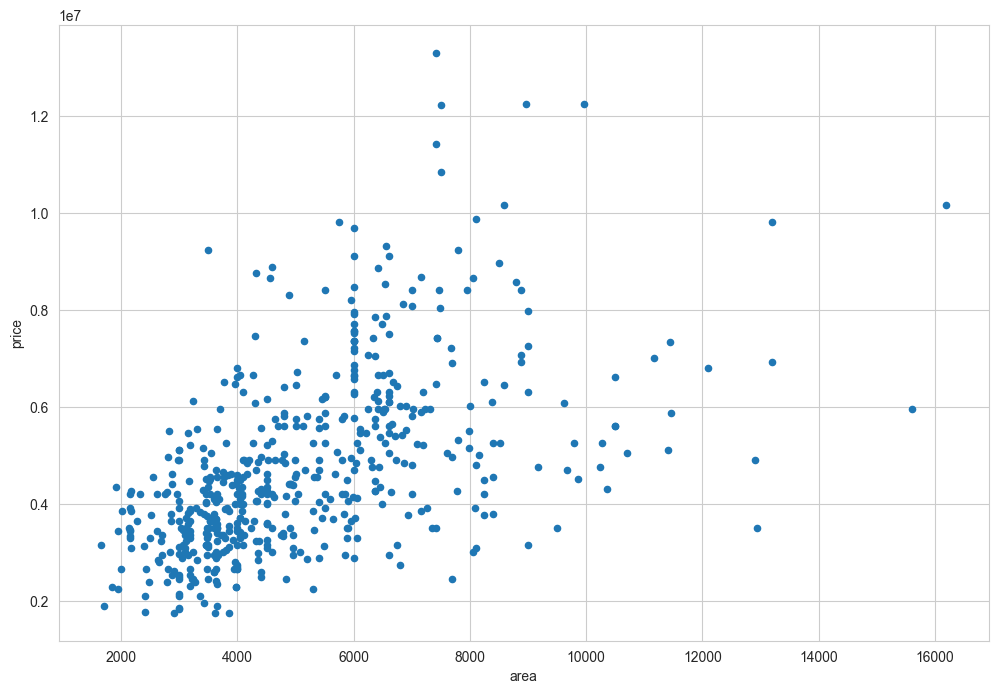

In [117]:
df.plot(x="area", y="price", kind="scatter", figsize=(12,8))
plt.show()

### Compute Loss function

In [118]:
def loss_function(w_0, w_1, df):
    n = df.area.shape[0]
    cost = 0

    for x, y in zip(df.area, df.price):
        cost = cost + (h(w_0, w_1, x) - y)**2
    
    return cost/(2*n)

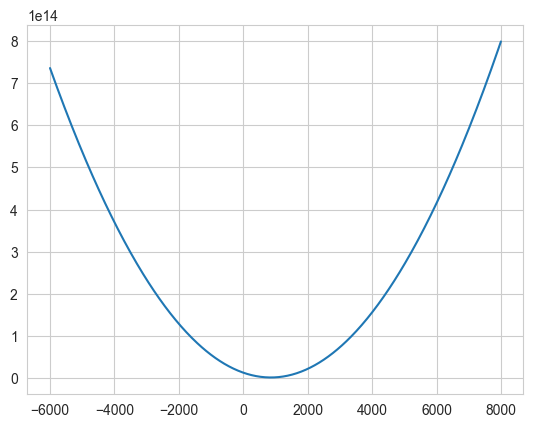

In [119]:
w_0 = 0

w_1 = np.linspace(-6000, 8000, 500)

sns.set_style("whitegrid")
plt.plot(w_1, [loss_function(w_0, w, df) for w in w_1])
plt.show()

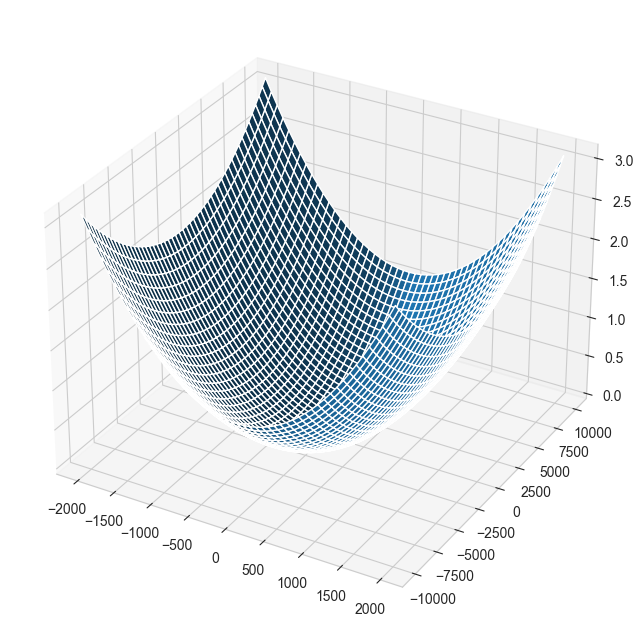

In [120]:
grid_w_0 = np.arange(-2000, 2000, 10)
grid_w_1 = np.arange(-10000, 10000, 20)

w_0, w_1 = np.meshgrid(grid_w_0, grid_w_1)

z = loss_function(w_0, w_1, norm)

sns.set_style("whitegrid")
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(projection = "3d")
ax.plot_surface(w_0, w_1, z)
plt.show()

### Gradient decsent

In [121]:
def grad_step(w_0, w_1, grad_0, grad_1, learning_rate=0.001):

    w_0 = w_0 - learning_rate * grad_0
    w_1 = w_1 - learning_rate * grad_1
    return w_0, w_1

In [122]:
def grad_w_0(w_0, w_1, df):
    n = df.area.shape[0]
    cost = 0

    for x, y in zip(df.area, df.price):
        cost = cost + (h(w_0, w_1, x) - y)
    
    return cost/n

def grad_w_1(w_0, w_1, df):
    n = df.area.shape[0]
    cost = 0

    for x, y in zip(df.area, df.price):
        cost = cost + (h(w_0, w_1, x) - y) * x
    
    return cost/n

In [123]:
def grad_descent(weights, df, num_iter, learning_rate=0.1, epsilon=0.0000000001):

    w_0, w_1 = weights
    loss = loss_function(w_0, w_1, df)
    loss_history = [loss]

    for i in range(num_iter):

        d_w_0 = grad_w_0(w_0, w_1, df)
        d_w_1 = grad_w_1(w_0, w_1, df)

        w_0, w_1 = grad_step(w_0, w_1, d_w_0, d_w_1, learning_rate=learning_rate)

        loss = loss_function(w_0, w_1, df)

        if abs(loss - loss_history[-1]) < epsilon:
            loss_history.append(loss)
            break

        loss_history.append(loss)

    return w_0, w_1, loss_history

### Normalization

In [124]:
def normalization(data):
    mean = np.mean(data)
    vague_range = np.max(data) - np.min(data)
    result = []
    for x in data:
        norm_x = (x - mean)/vague_range
        result.append(norm_x)
    
    return result

In [125]:
norm = pd.DataFrame()

In [126]:
norm["price"] = normalization(df.price)
norm["area"] = normalization(df.area)

norm.head(7)

,price,area
0,0.738811,0.155977
1,0.647902,0.261818
2,0.647902,0.330547
3,0.644872,0.161475
4,0.575175,0.155977
5,0.526690,0.161475
6,0.466084,0.235702


### Model training

In [127]:
w_0, w_1, history = grad_descent((0, 0), norm, 1000)

In [128]:
w_0

3.442709929571591e-17

In [129]:
w_1

0.5189491876061754

In [130]:
history

[0.013088679029173688,
 0.013071998071880324,
 0.013055391112733966,
 0.013038857823472602,
 0.013022397877290348,
 0.013006010948831033,
 0.012989696714181874,
 0.012973454850866876,
 0.012957285037840686,
 0.012941186955482053,
 0.012925160285587626,
 0.012909204711365667,
 0.01289331991742972,
 0.012877505589792369,
 0.012861761415859116,
 0.012846087084422189,
 0.01283048228565433,
 0.012814946711102651,
 0.012799480053682649,
 0.012784082007672087,
 0.012768752268704907,
 0.012753490533765231,
 0.012738296501181386,
 0.012723169870619973,
 0.012708110343079905,
 0.012693117620886436,
 0.012678191407685356,
 0.012663331408437135,
 0.012648537329411003,
 0.012633808878179274,
 0.01261914576361146,
 0.012604547695868542,
 0.012590014386397274,
 0.012575545547924453,
 0.012561140894451232,
 0.012546800141247481,
 0.012532523004846191,
 0.012518309203037772,
 0.01250415845486458,
 0.012490070480615354,
 0.012476045001819593,
 0.012462081741242137,
 0.012448180422877698,
 0.012434340771

In [131]:
len(history)

1001

### Донавчання

In [132]:
w_0, w_1, history_ext = grad_descent((w_0, w_1), norm, 1000)

### Training results visualization

In [133]:
w_1

0.5751442606066763

In [134]:
w_0

4.210189791089982e-17

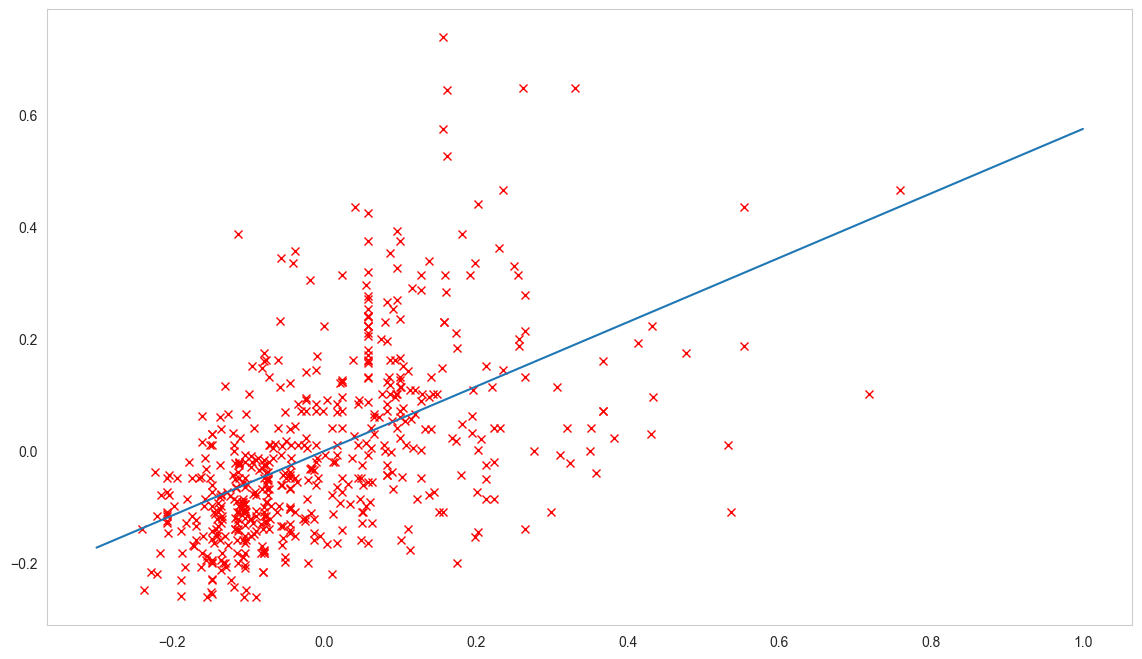

In [135]:
plt.figure(figsize=(14, 8))
plt.plot(norm.area, norm.price, "rx")
x = np.linspace(-0.3, 1, 500)
plt.plot(x, h(w_0, w_1, x))
plt.grid()

### Крива навчання

In [136]:
history = history + history_ext

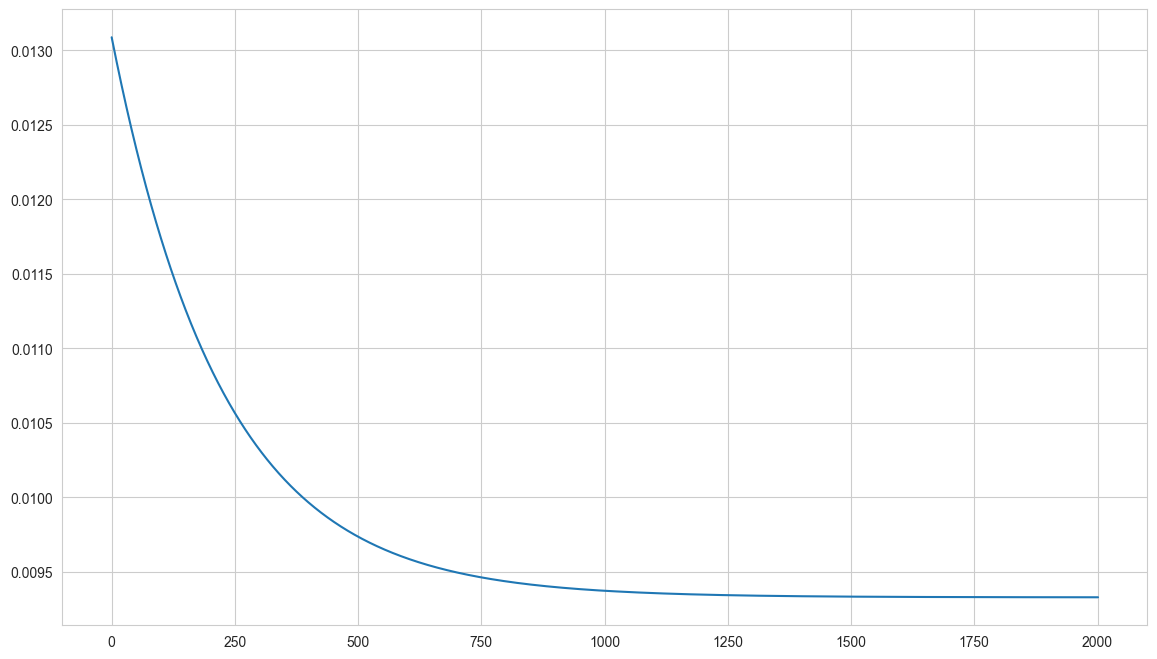

In [137]:
plt.figure(figsize=(14, 8))
plt.plot(history)

### Scikit-Learn Regression 

In [138]:
from sklearn import linear_model

In [139]:
model = linear_model.LinearRegression()

In [140]:
X = np.array([norm.area]).T
X.shape

(545, 1)

In [141]:
Y = np.array(norm.price)
Y.shape

(545,)

In [142]:
model.fit(X, Y)

LinearRegression()

In [143]:
model.coef_

array([0.58196837])

In [144]:
model.intercept_

6.353102831524843e-17

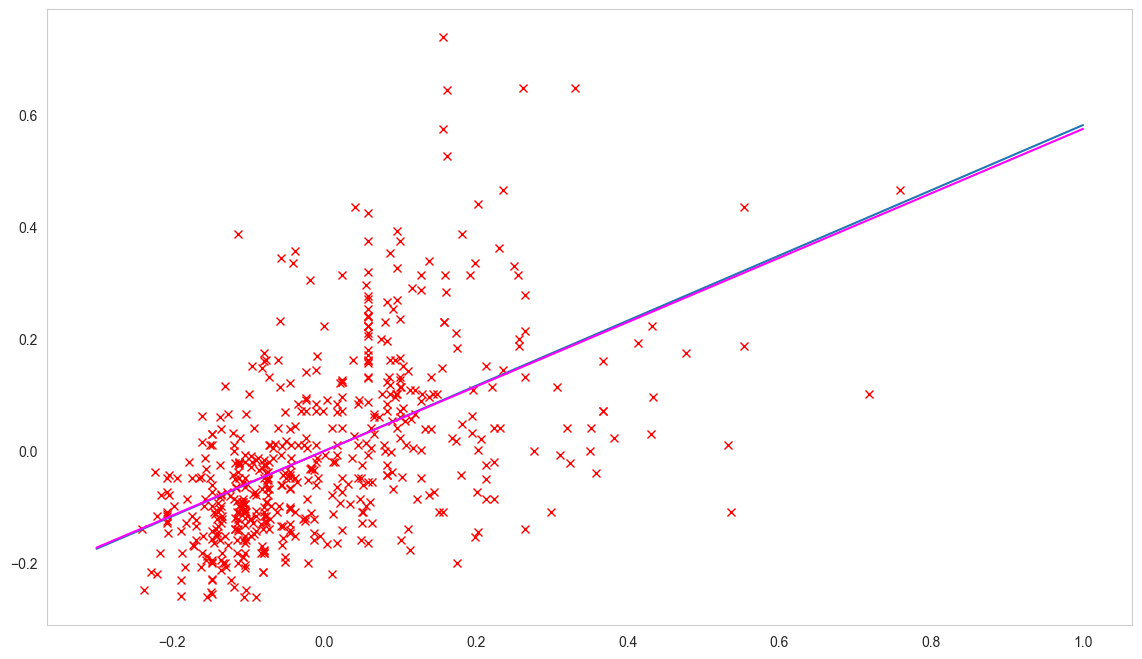

In [145]:
plt.figure(figsize=(14, 8))
plt.plot(norm.area, norm.price, "rx")
x = np.linspace(-0.3, 1, 500)
plt.plot(x, h(model.intercept_, model.coef_[0], x))
plt.plot(x, h(w_0, w_1, x), color="magenta")
plt.grid()